## Elementos finitos linear 1D

## Montar a matrix de massa

In [1]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [2/(a-b)^2 -2/(a-b)^2;-2/(a-b)^2 2/(a-b)^2 ]

stiff_matrix (generic function with 1 method)

In [2]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [3]:
stiff_matrix(-1,1)

2x2 Array{Float64,2}:
  0.5  -0.5
 -0.5   0.5

In [4]:
x = linspace(-1,1,101)
y1=[ϕ₁(x,-1,1) for x in linspace(-1,1,101)]
plot(x,y1)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[4], in expression starting on line 3

In [5]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [6]:
mass_matrix(0,1)

2x2 Array{Float64,2}:
 0.333333  0.166667
 0.166667  0.333333

In [7]:
a = -1.0
b = 1.0
Nel =  50
xn = [linspace(a,b,Nel+1);]
Ndof = size(xn,1);

In [8]:
xn

51-element Array{Float64,1}:
 -1.0 
 -0.96
 -0.92
 -0.88
 -0.84
 -0.8 
 -0.76
 -0.72
 -0.68
 -0.64
 -0.6 
 -0.56
 -0.52
  ⋮   
  0.56
  0.6 
  0.64
  0.68
  0.72
  0.76
  0.8 
  0.84
  0.88
  0.92
  0.96
  1.0 

In [9]:
Nel = size(xn,1)-1
dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x50 Array{Int64,2}:
 1  2  3  4  5  6  7  8   9  10  11  …  42  43  44  45  46  47  48  49  50
 2  3  4  5  6  7  8  9  10  11  12     43  44  45  46  47  48  49  50  51

In [10]:
M = zeros(Ndof, Ndof)

for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            M[kg,ig] += Me[k,i]
        end
    end
end
M

dM = zeros(Ndof, Ndof)

for e = 1:Nel
    dMe = stiff_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            dM[kg,ig] += dMe[k,i]
        end
    end
end
dM
dM = dM - M
            

51x51 Array{Float64,2}:
  1249.99  -1250.01      0.0       0.0   …      0.0       0.0       0.0 
 -1250.01   2499.97  -1250.01      0.0          0.0       0.0       0.0 
     0.0   -1250.01   2499.97  -1250.01         0.0       0.0       0.0 
     0.0       0.0   -1250.01   2499.97         0.0       0.0       0.0 
     0.0       0.0       0.0   -1250.01         0.0       0.0       0.0 
     0.0       0.0       0.0       0.0   …      0.0       0.0       0.0 
     0.0       0.0       0.0       0.0          0.0       0.0       0.0 
     0.0       0.0       0.0       0.0          0.0       0.0       0.0 
     0.0       0.0       0.0       0.0          0.0       0.0       0.0 
     0.0       0.0       0.0       0.0          0.0       0.0       0.0 
     0.0       0.0       0.0       0.0   …      0.0       0.0       0.0 
     0.0       0.0       0.0       0.0          0.0       0.0       0.0 
     0.0       0.0       0.0       0.0          0.0       0.0       0.0 
     ⋮                     

## Montar o lado direito da equação:

In [11]:
#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y'(-1) = 0,y'(1)=0
fun(x) = -4*pi^2*cos(2*pi*x) + cos(2*pi*x)
resp(x) = cos(2*pi*x)
dresp(x)= -2*pi*sin(2*pi*x)
#fun(x) = -8*pi^2*cos(2*pi*x) + 2*cos(2*pi*x)
#resp(x) = 2*cos(2*pi*x)


dresp (generic function with 1 method)

In [12]:
fe = fun(xn)

51-element Array{Float64,1}:
 -38.4784 
 -37.2695 
 -33.7189 
 -28.0496 
 -20.6178 
 -11.8905 
  -2.41608
   7.21014
  16.3833 
  24.5271 
  31.1297 
  35.7763 
  38.175  
   ⋮      
  35.7763 
  31.1297 
  24.5271 
  16.3833 
   7.21014
  -2.41608
 -11.8905 
 -20.6178 
 -28.0496 
 -33.7189 
 -37.2695 
 -38.4784 

In [14]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        

# Calculando a integral de maneira mais exata:
using Jacobi
Q = 20
z = zgj(Q)
w = wgj(z)

F2 = zeros(Ndof)
for e = 1:Nel
    Fe1 = 0.0
    Fe2 = 0.0
    a1 = xn[e]
    b1 = xn[e+1]
    x = ( (1-z)*a1 + (1+z)*b1 ) / 2
    J = (b1-a1) / 2
    for q = 1:Q
        f = fun(x[q])
        Fe1 += J * w[q] * f * ϕ₁(x[q], a1, b1)
        Fe2 += J * w[q] * f * ϕ₂(x[q], a1, b1)
    end
    i1 = dof_map[1,e]
    i2 = dof_map[2,e]
    F2[i1] += Fe1
    F2[i2] += Fe2
end



In [15]:
F = -F

51-element Array{Float64,1}:
  0.761509 
  1.47517  
  1.33463  
  1.11023  
  0.816074 
  0.470639 
  0.0956311
 -0.285385 
 -0.64847  
 -0.970808 
 -1.23215  
 -1.41607  
 -1.51101  
  ⋮        
 -1.41607  
 -1.23215  
 -0.970808 
 -0.64847  
 -0.285385 
  0.0956311
  0.470639 
  0.816074 
  1.11023  
  1.33463  
  1.47517  
  0.761509 

In [16]:
F2 = -F2

51-element Array{Float64,1}:
  0.765526 
  1.48295  
  1.34167  
  1.11609  
  0.820379 
  0.473121 
  0.0961356
 -0.286891 
 -0.65189  
 -0.975929 
 -1.23865  
 -1.42354  
 -1.51898  
  ⋮        
 -1.42354  
 -1.23865  
 -0.975929 
 -0.65189  
 -0.286891 
  0.0961356
  0.473121 
  0.820379 
  1.11609  
  1.34167  
  1.48295  
  0.765526 

## Solução do problema

In [17]:
u = dM\F

51-element Array{Float64,1}:
  0.0194009 
  0.0187914 
  0.0170011 
  0.0141426 
  0.0103955 
  0.0059952 
  0.00121819
 -0.00363536
 -0.0082605 
 -0.0123666 
 -0.0156956 
 -0.0180385 
 -0.0192479 
  ⋮         
 -0.0180385 
 -0.0156956 
 -0.0123666 
 -0.0082605 
 -0.00363536
  0.00121819
  0.0059952 
  0.0103955 
  0.0141426 
  0.0170011 
  0.0187914 
  0.0194009 

In [18]:
hcat(F,F2)

51x2 Array{Float64,2}:
  0.761509    0.765526 
  1.47517     1.48295  
  1.33463     1.34167  
  1.11023     1.11609  
  0.816074    0.820379 
  0.470639    0.473121 
  0.0956311   0.0961356
 -0.285385   -0.286891 
 -0.64847    -0.65189  
 -0.970808   -0.975929 
 -1.23215    -1.23865  
 -1.41607    -1.42354  
 -1.51101    -1.51898  
  ⋮                    
 -1.41607    -1.42354  
 -1.23215    -1.23865  
 -0.970808   -0.975929 
 -0.64847    -0.65189  
 -0.285385   -0.286891 
  0.0956311   0.0961356
  0.470639    0.473121 
  0.816074    0.820379 
  1.11023     1.11609  
  1.33463     1.34167  
  1.47517     1.48295  
  0.761509    0.765526 

In [19]:
u2 = dM\F2

51-element Array{Float64,1}:
  0.0195032 
  0.0188905 
  0.0170908 
  0.0142172 
  0.0104503 
  0.00602683
  0.00122462
 -0.00365454
 -0.00830407
 -0.0124318 
 -0.0157784 
 -0.0181336 
 -0.0193494 
  ⋮         
 -0.0181336 
 -0.0157784 
 -0.0124318 
 -0.00830407
 -0.00365454
  0.00122462
  0.00602683
  0.0104503 
  0.0142172 
  0.0170908 
  0.0188905 
  0.0195032 

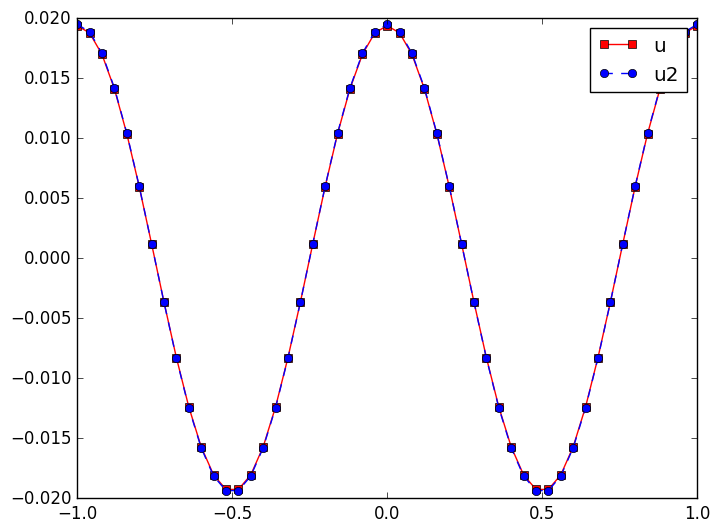

51-element Array{Float64,1}:
  0.0194009 
  0.0187914 
  0.0170011 
  0.0141426 
  0.0103955 
  0.0059952 
  0.00121819
 -0.00363536
 -0.0082605 
 -0.0123666 
 -0.0156956 
 -0.0180385 
 -0.0192479 
  ⋮         
 -0.0180385 
 -0.0156956 
 -0.0123666 
 -0.0082605 
 -0.00363536
  0.00121819
  0.0059952 
  0.0103955 
  0.0141426 
  0.0170011 
  0.0187914 
  0.0194009 

In [20]:
using PyPlot
xx = linspace(a, b, 201)
#plot(xx, resp(xx))
plot(xn, u, "rs-",label = "u")
plot(xn, u2, "bo--",label = "u2")
legend()
u

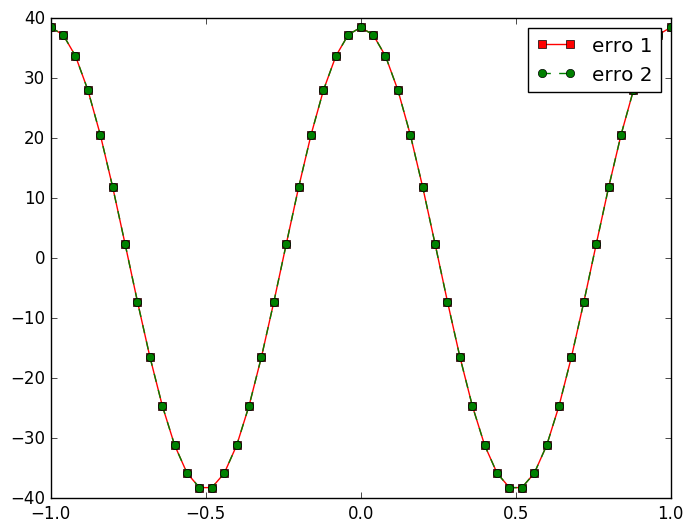

PyObject <matplotlib.legend.Legend object at 0x7f1318c099d0>

In [21]:
e1 = u - fe
e2 = u2 - fe
figure()
plot(xn, e1, "rs-",label="erro 1")
plot(xn, e2, "go--",label="erro 2")
legend()